# Beyond Hello World, A Computer Vision Example
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=2x-1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

## Start Coding

Let's start with our import of TensorFlow

In [0]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# tensorflow 임포트 후 버전을 확인하자

import tensorflow as tf
print(tf.__version__)

1.14.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [0]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# keras api를 통해 mnist dataset 가져오기

mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [0]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# scikit-learn을 사용해본 사용자라면 알겠지만, keras는 훨씬 더 간단하게 학습/검증 data set의 split이 가능하다

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

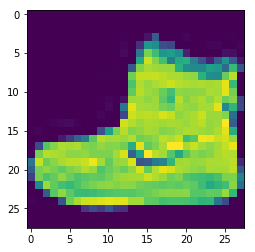

In [0]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# matplotlib으로 이미지화 시켜보기
# 하기는 index 0, 즉 첫 번째 example에 대한 수치 기반 시각화이다
# 어떤가? 부츠처럼 보이는가? ㅎㅎ

import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [0]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 255로 모든 수치를 나눠 normalize 시키기 => loop를 돌리지 않고, 이리도 간단하게 normalize된다는 사실!
# 왜 normalize를 시키는지 궁금하다면 상기 이메일로 문의주시길!

training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

In [0]:
#### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# fish through의 의미. 딥러닝도 공부하고, 영어도 공부하고. 하하!
# It means to search, or dig around for something in a pile or container of other things / usually you use your hands to “fish through”
# e.g. I needed a smoke, so I fished through my purse for a cigarette.
# e.g. I fished through the other students' files to find my grade report.

  
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [0]:
#### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# compile + fit / 평가 메트릭스는 '정확도'

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5027 - acc: 0.8222
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3766 - acc: 0.8644
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3382 - acc: 0.8758
Epoch 4/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3120 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2943 - acc: 0.8909


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [0]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.3473 - acc: 0.8751


[0.3472968965768814, 0.8751]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

To explore further, try the below exercises:


# Exploration Exercises

###Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [0]:
#### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# test_images에 대한 예측결과
# 첫 번째를 찍어봤더니, 리스트에 10개의 원소가 담겨 출력되었다. 각 값들이 의미하는 바는?
# => 차례로 0, 1, 2, 3, ... 9 (총 10개) 각각에 대해 그것이 정답일 확률(probability)!
# => 10번째 원소, 레이블 기준으로는 9 (0부터 시작하니)가 가장 높은 값이 찍혀나왔으니 AI는 그것이 정답이라 예측하는 것이다.

classifications = model.predict(test_images)

print(classifications[0])

[4.9881357e-05 5.9410615e-07 2.0418388e-07 4.4482493e-07 1.2962483e-06
 2.0109033e-03 5.3239869e-06 4.6248659e-02 1.2045667e-05 9.5167071e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

In [0]:
#### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 본 supervised learning에서 실제 정답을 확인해보면, 답은 '9'. 위의 예측이 맞았음을 알 수 있다.

print(test_labels[0])

9


### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes



####Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

For the 7, the probability was .999+, i.e. the neural network is telling us that it's almost certainly a 7.

### How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list




####Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

##Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 



In [0]:
#### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 뉴런 수를 기 128 -> 1024로 늘려보기. 효과는?
# => 연산이 더 오래 걸리지만, (적어도 본 예제에서는) 정확도가 개선되는 효과가 있다

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # 입력층의 뉴런 개수 1024개로 설정
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # 출력층의 뉴런 개수 10개로 설정
# 본 예제에서는 은닉층 설정하지 않음

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.14.0
11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 13s 215us/sample - loss: 0.1887
Epoch 2/5
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0745
Epoch 3/5
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0473
Epoch 4/5
60000/60000 [==============================] - 13s 209us/sample - loss: 0.0349
Epoch 5/5
10000/10000 [==============================] - 1s 84us/sample - loss: 0.0659
[6.01861783e-10 8.30136015e-10 5.35538263e-08 1.14195544e-07
 3.37506952e-14 5.98513350e-10 1.20964064e-14 9.99999881e-01
 4.35142533e-10 3.02713339e-08]
7


###Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


####Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

##Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [0]:
#### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# rule of thumb?
# 우리말로 직역하자면, '엄지손가락의 법칙' 
# 이는, 과학/수학적 법칙에 의한 것이 아닌, 경험에서 우러나 실용적으로 사용하는 수단/방침을 뜻하는 표현
# 즉, '어림짐작, 눈대중, 대략'의 의미임

# 아래를 돌리면 오류가 난다. 왜 그러겠는가?
# 정답은? => Flatten()을 생략해서 그러함. 입력층의 shape과 input data의 shape을 맞춰주기 위해, 1차원 vector로 변환하는 플래튼 과정이 필요하다

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.14.0
Epoch 1/5


InvalidArgumentError: ignored

##Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [0]:
#### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 출력층의 뉴런 수를 기 10 -> 5로 변경 => 오류남
# 왜 오류가 나는가? 분류하고자 하는 가지수와 출력층의 뉴런수를 맞춰줘야 한다
# 10가지로 분류하고 있으니 (그러니 위에서 predict도 10개 element에 대해 리스트 내에서 10개 확률로 뱉어내고 있는 것이고)
# 출력층의 뉴런도 10개로 맞춰줘야 한다


import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])
             

1.14.0
Epoch 1/5


InvalidArgumentError: ignored

##Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

In [0]:
#### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 레이어(층)를 하나 추가했다. 임팩트는?
# 본 예제에서는, 극히 심플한 예제인 관계로, 큰 효과성이 없다. 그러나 보다 복잡도가 높은 이미지 판별에 있어서는
# 연산이 느려진다는 tradeoff에도 불구하고 layer 복잡도를 올려야 하는 경우가 대다수이다 (단, 이것도 한계점이 있음 - layer 복잡도 설정 기준에 있어서는 추후 논의)

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.14.0
Epoch 1/5


InvalidArgumentError: ignored

#Exercise 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [0]:
#### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# there's no point의 의미
# You can say this if you think someone's doing something, or thinking of doing something, that is pointless or sure to fail
# epoch을 조정하면, loss value가 증가, 감소 하는 추세가 달라짐을 동적으로 확인할 수 있다 (본 예제에서는 시각화를 시키지 않았지만)

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

1.14.0
Epoch 1/30


InvalidArgumentError: ignored

#Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [0]:
#### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# normalize (위의 경우 255로 나누기) 시키지 않고 연산시키면 결과값이 달라짐. 왜이겠는가? ㅎㅎ

import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

#Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [0]:
#### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# epoch을 몇으로 설정했건, 특정 정확도(loss로 역산) 달성 시 연산을 stop시키는 myCallback 클래스 정의

import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks]) # 위에서 객체로 찍어낸 콜백 클래스를 모델 학습fit argument로 넣어주기




1.14.0
Epoch 1/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4762
Epoch 2/5
59872/60000 [============================>.] - ETA: 0s - loss: 0.3599
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3597
